## Milwaukee Housing Data - Larissa Kidd 11/28/2023
### From https://data.milwaukee.gov/dataset/property-sales-data
Every year, the city of Milwaukee uploads a data file about which houses were sold in that past year. I want to compare 2002 against 2022 for a comparison of the 20 year difference and use 2012 for a 10 year difference between 2002 and 2022.

Background info about the variables:
Dataset information: Milwaukee historical housing sales.
Field Name =Description
PropertyID	= A unique identifier for each property.
PropType= The type of property (e.g., Commercial or Residential).
taxkey =The tax key associated with the property
Address = The address of the property.
CondoProject= Information about whether the property is part of a condominium	project (NaN indicates missing data).
District= The district number for the property.
nbhd= The neighborhood number for the property.
Style =The architectural style of the property.
Extwall =The type of exterior wall material used.
Stories =The number of stories in the building.
Year_Built =The year the property was built.
Rooms =The number of rooms in the property.
FinishedSqft =The total square footage of finished space in the property.
Units =The number of units in the property(e.g., apartments in a multifamily building) 
Bdrms =The number of bedrooms in the property.
Fbath =The number of full bathrooms in the property.
Hbath =The number of half bathrooms in the property.
Lotsize =The size of the lot associated with the property.
Sale_date =The date when the property was sold.
Sale_price =The sale price of the property.

In [65]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [66]:
data02 = pd.read_csv('2002-property-sales-data.csv')
data12 = pd.read_csv('2012-property-sales-data.csv')
data22 = pd.read_csv('2022-property-sales-data.csv')
data02.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Commercial,3230461110,2628 N 6TH ST,NaN,6,6258,Commercial Exempt,NaN,2.0,1880,0,1840,1,0,0,0,12750,2002-01,15900
1,Commercial,3590192000,1363 N PROSPECT AV,NaN,3,6262,Mansions With Commercial Usage,NaN,2.0,1876,0,6377,1,0,0,0,11840,2002-01,850000
2,Commercial,4161194000,617 S 94TH ST,NaN,10,6272,Service Building,NaN,1.0,1954,0,5022,1,0,0,0,9700,2002-01,119000
3,Commercial,1719836000,3624 W SILVER SPRING DR,NaN,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1955,0,6420,1,0,0,0,8792,2002-01,210000
4,Commercial,3480290000,3830 W LISBON AV,NaN,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",NaN,2.0,1909,0,5956,1,0,0,0,4840,2002-01,48500


In [67]:
data12.head()

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,Residential,1930715000,5271 N TEUTONIA AV,NaN,1,1160,Cape Cod,Aluminum / Vinyl,1.0,1940,0,1206,1,3,1,0,5880,2012-01,35000
1,Residential,2081312000,5138 N 40TH ST,NaN,1,1440,Ranch,Aluminum / Vinyl,1.0,1952,0,908,1,2,1,0,3270,2012-01,34507
2,Residential,2260831000,4463 N 66TH ST,NaN,2,1490,Cape Cod,Brick,1.0,1953,0,1512,1,3,2,0,5250,2012-01,112900
3,Residential,2120137000,7009 W VILLARD AV,NaN,2,1380,Cape Cod,Aluminum / Vinyl,1.0,1956,0,1326,1,4,1,0,4800,2012-01,67000
4,Residential,1440202000,9131 W EDGEWATER DR,NaN,2,480,Colonial,Aluminum / Vinyl,2.0,2003,0,1991,1,4,2,1,21571,2012-01,194800


In [68]:
data22.head()

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98461,Manufacturing,30131000,9434-9446 N 107TH ST,NaN,9,6300,Service Building,Concrete Block,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0,2022-04-01,950000.0
1,98464,Commercial,30152000,9306-9316 N 107TH ST,NaN,9,6202,Office Building - 1 Story,Brick,1.0,1982.0,NaN,9688.0,23,NaN,0,0,35719,2022-10-07,385000.0
2,98508,Residential,49980110,9327 N SWAN RD,NaN,9,40,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648,2022-01-07,800000.0
3,98519,Residential,49993200,9411 W COUNTY LINE RD,NaN,9,40,Ranch,Aluminum/Vinyl,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200,2022-08-09,280000.0
4,98561,Residential,50042000,9322 N JOYCE AV,NaN,9,40,Ranch,Aluminum/Vinyl,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303,2022-05-23,233100.0


In [69]:
data22 = data22.rename(columns = {'taxkey':'Taxkey','nbhd':'Nbhd','Rooms':'Nr_of_rms','FinishedSqft':'Fin_sqft'})

In [70]:
data02.shape

(170, 19)

The shape of data02 is important to remember as the numbers are based off of much less data

In [71]:
data12.shape

(1996, 19)

In [72]:
data22.shape

(7146, 20)

In [73]:
full_df = pd.concat([data02, data12, data22], keys=['2002 Housing Data','2012 Housing Data','2022 Housing Data'])
full_df

PropType      Taxkey                  Address  \
2002 Housing Data 0      Commercial  3230461110            2628 N 6TH ST   
                  1      Commercial  3590192000       1363 N PROSPECT AV   
                  2      Commercial  4161194000            617 S 94TH ST   
                  3      Commercial  1719836000  3624 W SILVER SPRING DR   
                  4      Commercial  3480290000         3830 W LISBON AV   
...                             ...         ...                      ...   
2022 Housing Data 7141  Condominium  7160339000          1912 W SALEM ST   
                  7142  Condominium  7160351000           6316 S 20TH ST   
                  7143  Condominium  7160365000           6376 S 20TH ST   
                  7144  Condominium  7160366000           6378 S 20TH ST   
                  7145  Condominium  7160375000           6354 S 20TH ST   

                           CondoProject  District  Nbhd  \
2002 Housing Data 0                 NaN         6  6258   
                  1                 NaN         3  6262   
                  2                 NaN        10  6272   
                  3                 NaN         1  6218   
                  4                 NaN        15  6254   
...                                 ...       ...   ...   
2022 Housing Data 7141  COLLEGE HEIGHTS        13  5360   
                  7142  COLLEGE HEIGHTS        13  5360   
                  7143  COLLEGE HEIGHTS        13  5360   
                  7144  COLLEGE HEIGHTS        13  5360   
                  7145  COLLEGE HEIGHTS        13  5360   

                                                                   Style  \
2002 Housing Data 0                                    Commercial Exempt   
                  1                       Mansions With Commercial Usage   
                  2                                     Service Building   
                  3     Store Bldg - Multi Story (Store & Apt, Store & O   
                  4     Store Bldg - Multi Story (Store & Apt, Store & O   
...                                                                  ...   
2022 Housing Data 7141                              Low Rise 1-3 Stories   
                  7142                              Low Rise 1-3 Stories   
                  7143                              Low Rise 1-3 Stories   
                  7144                              Low Rise 1-3 Stories   
                  7145                              Low Rise 1-3 Stories   

                       Extwall  Stories  Year_Built  Nr_of_rms  Fin_sqft  \
2002 Housing Data 0        NaN      2.0      1880.0        0.0    1840.0   
                  1        NaN      2.0      1876.0        0.0    6377.0   
                  2        NaN      1.0      1954.0        0.0    5022.0   
                  3        NaN      2.0      1955.0        0.0    6420.0   
                  4        NaN      2.0      1909.0        0.0    5956.0   
...                        ...      ...         ...        ...       ...   
2022 Housing Data 7141     NaN      2.0      1974.0       10.0    1100.0   
                  7142     NaN      1.0      1974.0        5.0    1379.0   
                  7143     NaN      2.0      1974.0       10.0    1100.0   
                  7144     NaN      2.0      1974.0        5.0    1100.0   
                  7145     NaN      1.0      1974.0        5.0    1141.0   

                        Units  Bdrms  Fbath  Hbath  Lotsize   Sale_date  \
2002 Housing Data 0         1    0.0      0      0    12750     2002-01   
                  1         1    0.0      0      0    11840     2002-01   
                  2         1    0.0      0      0     9700     2002-01   
                  3         1    0.0      0      0     8792     2002-01   
                  4         1    0.0      0      0     4840     2002-01   
...                       ...    ...    ...    ...      ...         ...   
2022 Housing Data 7141      1    4.0      1      1    

There exists some unimportant columns with majority 'NaN' so I don't mind removing these columns from my analysis

In [74]:
full_df = full_df.drop(columns = 'CondoProject')

In [75]:
full_df = full_df.drop(columns = 'Extwall')

In [77]:
full_df = full_df.drop(columns = 'PropertyID')

In [78]:
full_df.head()

PropType      Taxkey                  Address  \
2002 Housing Data 0  Commercial  3230461110            2628 N 6TH ST   
                  1  Commercial  3590192000       1363 N PROSPECT AV   
                  2  Commercial  4161194000            617 S 94TH ST   
                  3  Commercial  1719836000  3624 W SILVER SPRING DR   
                  4  Commercial  3480290000         3830 W LISBON AV   

                     District  Nbhd  \
2002 Housing Data 0         6  6258   
                  1         3  6262   
                  2        10  6272   
                  3         1  6218   
                  4        15  6254   

                                                                Style  \
2002 Housing Data 0                                 Commercial Exempt   
                  1                    Mansions With Commercial Usage   
                  2                                  Service Building   
                  3  Store Bldg - Multi Story (Store & Apt, Store & O   
                  4  Store Bldg - Multi Story (Store & Apt, Store & O   

                     Stories  Year_Built  Nr_of_rms  Fin_sqft  Units  Bdrms  \
2002 Housing Data 0      2.0      1880.0        0.0    1840.0      1    0.0   
                  1      2.0      1876.0        0.0    6377.0      1    0.0   
                  2      1.0      1954.0        0.0    5022.0      1    0.0   
                  3      2.0      1955.0        0.0    6420.0      1    0.0   
                  4      2.0      1909.0        0.0    5956.0      1    0.0   

                     Fbath  Hbath  Lotsize Sale_date  Sale_price  
2002 Housing Data 0      0      0    12750   2002-01     15900.0  
                  1      0      0    11840   2002-01    850000.0  
                  2      0      0     9700   2002-01    119000.0  
                  3      0      0     8792   2002-01    210000.0  
                  4      0      0     4840   2002-01     48500.0

## And so begins the analysis plan!

The first thing I want to demonstrate is the distribution of property types with each year.

In [15]:
PropType = data02.groupby('PropType').count()['Taxkey']
PropType.index

Index(['Commercial', 'Lg Apartment', 'Residential', 'Vacant Land'], dtype='object', name='PropType')

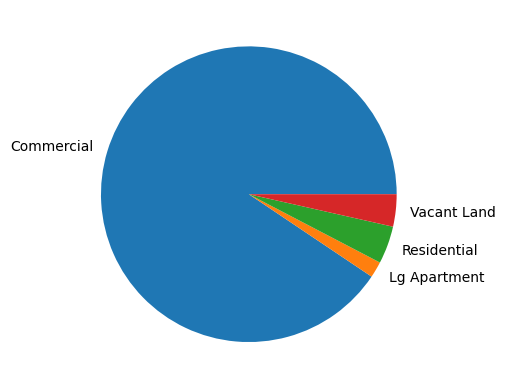

In [16]:
fig1, ax1 = plt.subplots()

ax1.pie(PropType.values,labels=PropType.index)

plt.show()

2002 has a large portion of commercial and also vacant land which creates a spread for sale prices

In [17]:
PropType12 = data12.groupby('PropType').count()['Taxkey']
PropType12.index

Index(['Commercial', 'Condominium', 'Lg Apartment', 'Residential',
       'Vacant Land'],
      dtype='object', name='PropType')

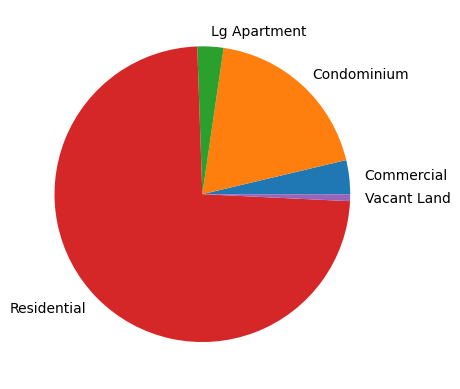

In [18]:
fig2, ax2 = plt.subplots()

ax2.pie(PropType12.values,labels=PropType12.index)

plt.show()

This graph is interesting becuase there is way less commercial and vacant land but way more condos!

In [19]:
PropType22 = data22.groupby('PropType').count()['Taxkey']
PropType22.index

Index(['Commercial', 'Condominium', 'Exempt', 'Lg Apartment', 'Manufacturing',
       'Residential'],
      dtype='object', name='PropType')

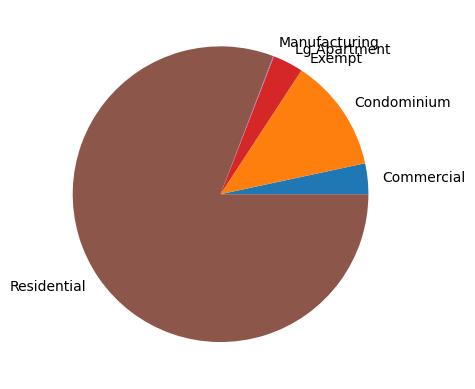

In [20]:
fig3, ax3 = plt.subplots()

ax3.pie(PropType22.values,labels=PropType22.index)

plt.show()

There are some additional categories that don't account for many, but the condo is the secondary category

This graph below is comparing the different districts and how often a house is sold. 

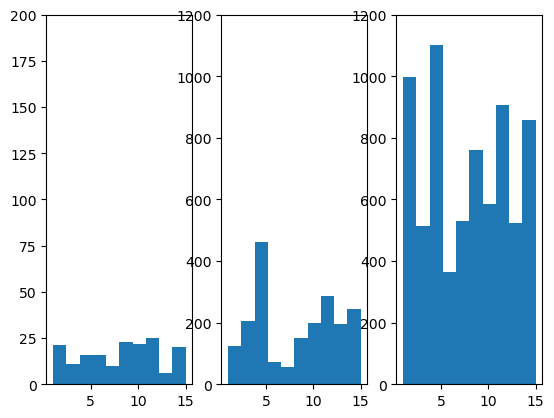

In [48]:
fig4, ax4 = plt.subplots(1,3)

ax4[0].hist(data02['District'])
ax4[1].hist(data12['District'])
ax4[2].hist(data22['District'])

ax4[0].set_ylim(bottom =0,top=200)
ax4[1].set_ylim(bottom =0,top=1200)
ax4[2].set_ylim(bottom =0,top=1200)

plt.show()

The 2002 data is significantly zoomed in as to show the trends even with little data. It is intersting that, even with the increase of sales overall between the years, the districts still maintain ratios. 

In [21]:
data02['Sale_price'].describe()['max']

3750000.0

In [22]:
data12['Sale_price'].describe()['max']

40877000.0

In [23]:
data22['Sale_price'].describe()['max']

21850000.0

2012 has the highest Sale price of the 3 different years which is interesting because 2022 had a large sample size and was 10 years later

In [24]:
data02['Sale_price'].describe()['mean']

277875.68823529413

In [25]:
data12['Sale_price'].describe()['mean']

204349.92034068136

In [26]:
data22['Sale_price'].describe()['mean']

271544.9654352085

While it is surprising that 2002 has the highest mean sale price, it makes sense when looking again at the pie chart that says that 2002 had majority commercial properties.

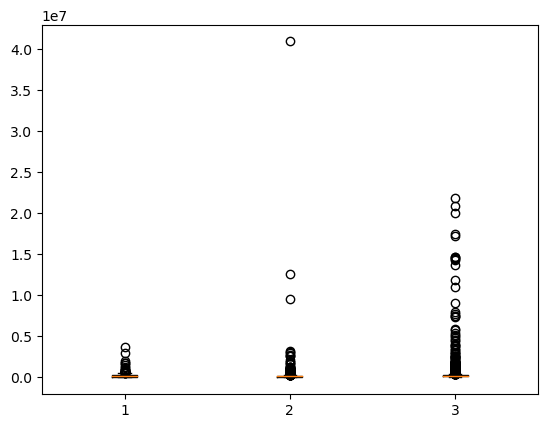

In [28]:
fig5, ax5 = plt.subplots()

ax5.boxplot(data02['Sale_price'], positions = [1])
ax5.boxplot(data12['Sale_price'], positions = [2])
ax5.boxplot(data22['Sale_price'], positions = [3])



plt.show()

This graph shows why 2012 had the highest Sale price. If the greatest point in 2012 were omitted, the range would make sense to show that as the year increases, so does the Sale price - as 2022 has a greater spread

In [30]:
data2002 = data02[data02['Year_Built']!=0]
data2012 = data12[data12['Year_Built']!=0]
data2022 = data22[data22['Year_Built']!=0]

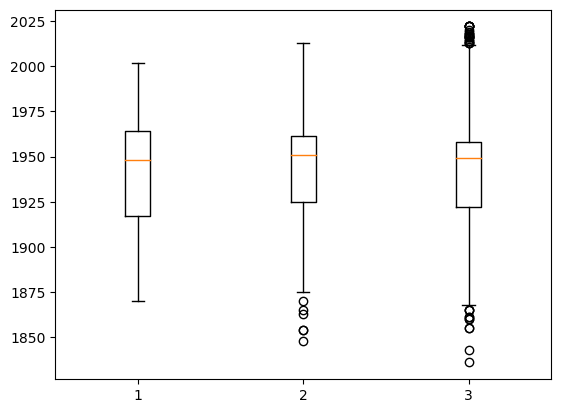

In [32]:
fig6, ax6 = plt.subplots()

ax6.boxplot(data2002['Year_Built'], positions = [1])
ax6.boxplot(data2012['Year_Built'], positions = [2])
ax6.boxplot(data2022['Year_Built'].dropna(), positions = [3])

plt.show()

I am curious to see if there are Year_Built years ahead of when the property is sold... 

In [36]:
data2002['Year_Built'].describe()['max']

2002.0

In [34]:
data2012['Year_Built'].describe()['max']

2013.0

In [35]:
data2022['Year_Built'].describe()['max']

2022.0

At first thought, it seems weird that there is a Year_built date ahead of when the property is sold in the 2012 data. But, it makes sense because there are times when a sale closes before the property is finished.

Upon first attempting the barplot, there was an issue with the 2022 data missing..

In [37]:
data2022[data2022['Year_Built'].isna()]

,PropertyID,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
2,98508,Residential,49980110,9327 N SWAN RD,NaN,9,40,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648,2022-01-07,800000.0
194,102602,Residential,740232000,8201 N 111TH ST,NaN,9,240,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,15427,2022-05-25,57500.0
225,103040,Manufacturing,810202100,8219 W BRADLEY RD,NaN,9,6300,Special - to use this code see supv.,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-10-06,820000.0
525,110027,Commercial,1439989212,8526 W MILL RD,NaN,9,6449,"Licensed Res Care Facility, Halfway House, etc.",NaN,NaN,NaN,NaN,17095.0,41,NaN,0,0,74618,2022-06-10,1156200.0
1771,135165,Manufacturing,2309997000,3025 W ATKINSON AV,NaN,1,6300,Special - to use this code see supv.,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-09-30,320000.0
1938,139550,Exempt,2490008100,5600 W FOND DU LAC AV,NaN,7,24910,Commercial Exempt,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,2022-09-09,225000.0
3387,172821,Residential,3141154000,3063 N HOLTON ST,NaN,6,2930,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,3136,2022-04-22,10000.0
3537,175501,Residential,3200512000,2626-2628 N BARTLETT AV,NaN,3,3190,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,3600,2022-08-31,75000.0
3620,177302,Commercial,3220902100,2669-2671 N MARTIN L KING JR DR,NaN,6,6258,Office Building - Multi Story ( Ofc & Apt),NaN,NaN,NaN,NaN,0.0,1,NaN,0,0,10500,2022-01-20,347000.0
4835,205735,Commercial,4190732000,7225 W MAIN ST,NaN,10,6272,Parking Lot,NaN,NaN,NaN,NaN,0.0,300,NaN,0,0,141352,2022-09-13,850000.0


So, why not take a look at some of the addresses as they currently are?

![9327_N_SWAN_RD.png](attachment:9327_N_SWAN_RD.png)

This property is obviously a grass plot, so it can't have a year built!

![8526_W_Mill_Rd.png](attachment:8526_W_Mill_Rd.png)

This property, however, was clearly built sometime prior to 2007 - so it could be a problem with data recording or some of them could be empty plots. With the lack of data across the board, it is hard to assume one way or the other.

For the next graph, I wanted to compare Lot Size versus Finished Sq. Ft.

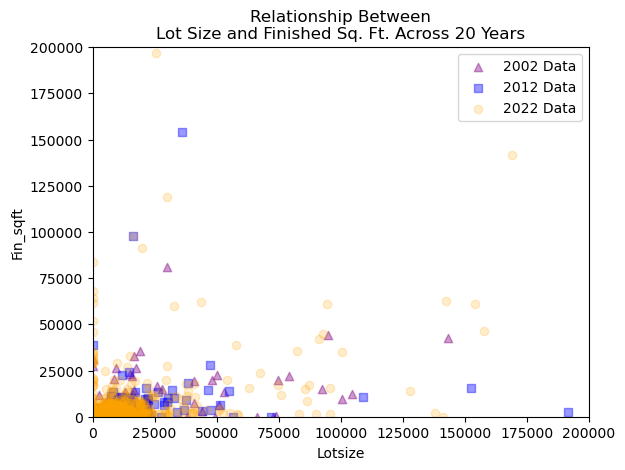

In [50]:
fig7, ax7 = plt.subplots()
ax7.scatter(x = data02['Lotsize'], 
            y = data02['Fin_sqft'],
            label = '2002 Data', color = 'purple', 
            marker = '^', alpha = .4)
ax7.scatter(x = data12['Lotsize'],
           y = data12['Fin_sqft'], 
            label = '2012 Data', color = 'blue', 
            marker = 's', alpha = .4)
ax7.scatter(x = data22['Lotsize'],
           y = data22['Fin_sqft'], 
            label = '2022 Data', color = 'orange', 
            marker = 'o', alpha = .2)

ax7.set_xlabel('Lotsize')
ax7.set_ylabel('Fin_sqft')

ax7.set_xlim(left=0,right=200000)
ax7.set_ylim(bottom =0,top=200000)

ax7.set_title('Relationship Between\nLot Size and Finished Sq. Ft. Across 20 Years')
ax7.legend()

plt.show()

I wanted to adjust the x and y limits to show a zoomed in look because these data points are clumped in the bottom left but I feel as though this demonstrates the slightly swayed ratio with finished sq ft and lot size while also show the cases where the lot size is 0 and the finished sq ft is the whole property. I like this plot but I want to see more..

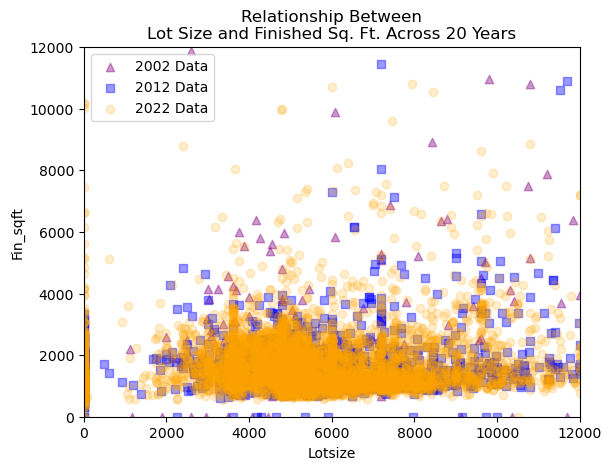

In [60]:
fig8, ax8 = plt.subplots()
ax8.scatter(x = data02['Lotsize'], 
            y = data02['Fin_sqft'],
            label = '2002 Data', color = 'purple', 
            marker = '^', alpha = .4)
ax8.scatter(x = data12['Lotsize'],
           y = data12['Fin_sqft'], 
            label = '2012 Data', color = 'blue', 
            marker = 's', alpha = .4)
ax8.scatter(x = data22['Lotsize'],
           y = data22['Fin_sqft'], 
            label = '2022 Data', color = 'orange', 
            marker = 'o', alpha = .2)

ax8.set_xlabel('Lotsize')
ax8.set_ylabel('Fin_sqft')

ax8.set_xlim(left=0,right=12000)
ax8.set_ylim(bottom =0,top=12000)

ax8.set_title('Relationship Between\nLot Size and Finished Sq. Ft. Across 20 Years')
ax8.legend()

plt.show()

Here is an even more zoomed in perspective of the two variables where the clump occurs. This gives me a better idea of the ratio where lot size is bigger than finished square feet. I can hypothesize that this chart would look different if the analysis were to be completed on a different city.

### In conclusion:
I am untilmately disappointed in the fullness of the data in the earlier years as well as the lack of completeness with 2022, the largest data set. If I had greater skill set, I would have cleaned filler data out and then randomly selected data from 2012 and 2022 so that each year all had the same amount data for easier comparison. Or, I could've selected later data with only 5 year gaps between and had more full data. 

Nevertheless, I enjoyed working with this type of data because there are so many different stories that housing data tells because of the social and financial aspects connected to housing data. I'm happy for the outcome even with the issues that I had with the data!